 Nama : Sandy Putra Utama
- Data : Fintech 
- Topic : Customer Churn Prediction

In [10]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Explanation

In [68]:
# Mengimpor dataset
df = pd.read_csv("data_input/data_fintech.csv") 
df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


Data yang digunakan adalah data dari salah satu perusahaaan aplikasi yang bergerak khusus pada bidang financial tracking keuangan untuk personal user atau untuk umkm, dari aplikasi fintrack ini kita bisa tau pola pengeluaran/pemasukan uang yang kita punya, dan siapapun yang mendownload diberikan waktu masa trial/uji coba aplikasi selama 24 jam untuk menggunakan beberapa fitur-fitur yang ada di aplikasi ini, ada yang bisa di akses selamanya yaitu feature gratis dan ada fitur yang premium(berbayar) yang bisa di akses hanya selama masa trial, dan bagi yang merasa feature premium ini sangat dibutuhkan maka setelah 24jam feature premium akan di tutup dan user dengan premium feature bisa memutuskan akan berlangganan atau tidak.


- user		     = user disini adalah user id atau sama seperti nik jika di ktp, dimana data id ini memuat banyak informasi, data ini adalah komponen utama jika kita ingin tahu ({nama, alamat, email, ip address dll,.})
- first open 		= kapan pertama kali user membuka aplikasinya setelah di download
- dayofweek 		= adalah indeks hari [0 - 6] = [minggu - sabtu]
- hour 			= pada jam berapa pengguna mengaktifkan aplikasi pertama kali
- age 			= usia pengguna aplikasi
- screen list		= halaman apa saja yang sudah di buka oleh pengguna
- num screens     = banyaknya halaman yang sudah dibuka oleh pengguna (ada beberapa numscreen yang tidak sesuai dengan screen list)
- minigame        = fitur game disini artinya pengguna menggunakan game atau tidak [0 - 1] = [Tidak - Ya]
- used premium feature 	= apakah user menggunakan fiture premium berbayar atau tidak selama trial aplikasi di 24jam [0 - 1] = [Tidak - Ya]
- enrolled        = adalah keputusan pengguna untuk berlangganan atau tidak [0 - 1] = [Tidak - Ya] kolom ini tidak terbatas pada masa trial selama 24jam
- enrolled date   = waktu keputusan pengguna berlangganan
- liked           = apakah user menekan fitur like pada aplikasinya [0 - 1] = [Tidak - Ya]

In [12]:
# Ringkasan data
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# cek tipe data
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [14]:
# Merevisi kolom num_screens
df['screen_list'] = df.screen_list.astype(str) + ','
df['num_screens'] = df.screen_list.str.count(',')

In [15]:
# menghapus kolom asli yang bias terhadap jumlah screen yang ada
df.drop(columns=['numscreens'], inplace=True)

In [16]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,liked,num_screens
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",0,0,0,NaN,0,13
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaN,0,11
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan,",0,1,0,NaN,1,3
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",0,0,1,2013-07-05 16:11:49.513,0,17
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",0,0,1,2013-02-26 18:56:37.841,1,19


In [17]:
# Cek kolom hour
df.hour[1] # terdapat sepasi sebelum angka 0 pada jam maka akan dilakukan slicing
df.hour = df.hour.str.slice(1,3).astype(int)

In [18]:
# Mendefinisikan variabel khusus numerik
df_numerik = df.drop(columns=['user','first_open','screen_list',
                                      'enrolled_date'], inplace=False)

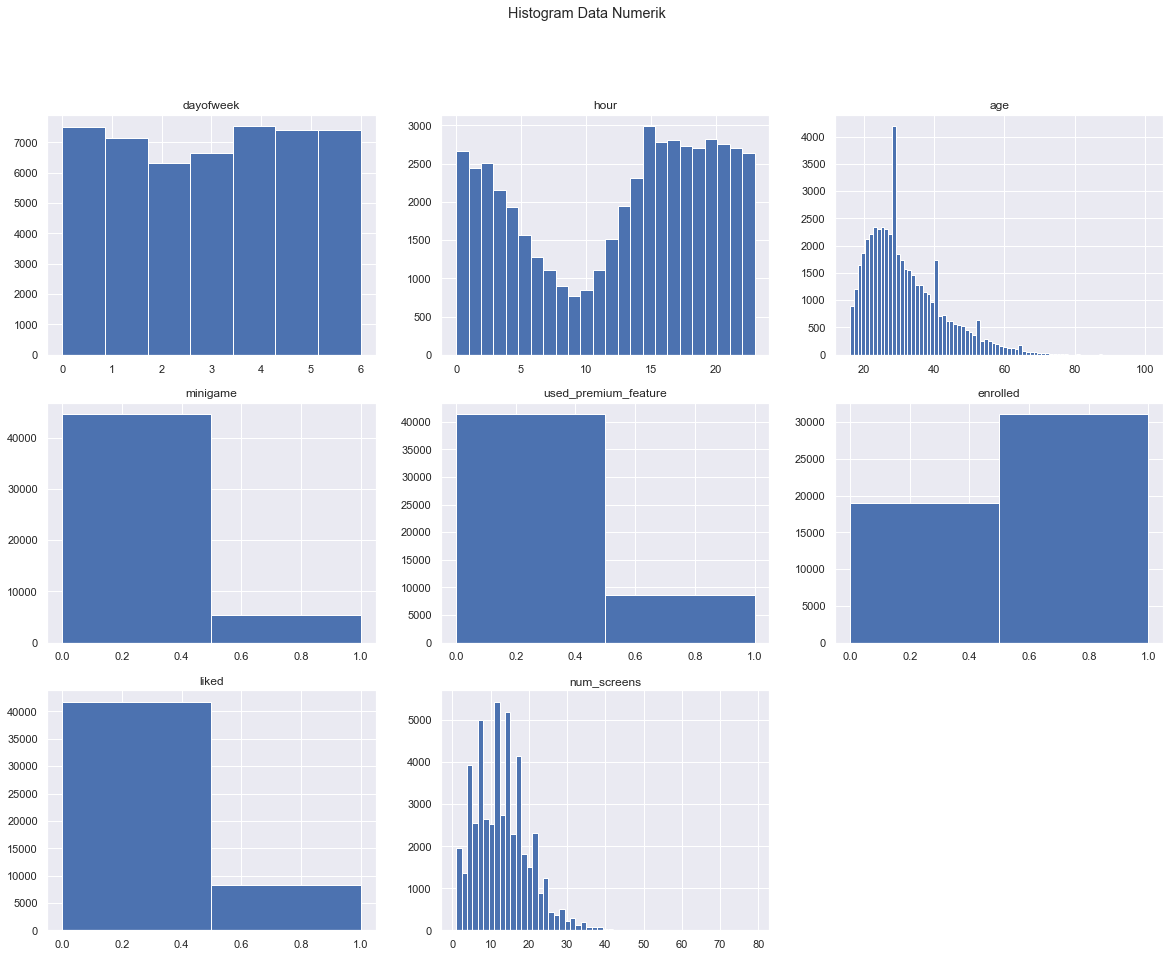

In [19]:
# Membuat histogram dari data numerik
fig,ax = plt.subplots(figsize=(20,15))
sns.set()
plt.suptitle('Histogram Data Numerik')
for i in range(0, df_numerik.shape[1]):
    plt.subplot(3,3,i+1)
    figure = plt.gca()
    figure.set_title(df_numerik.columns.values[i])
    jumlah_bin = np.size(df_numerik.iloc[:,i].unique())
    plt.hist(df_numerik.iloc[:,i], bins=jumlah_bin)

<AxesSubplot:title={'center':'Korelasi variabel terhadap keputusan Enrolled'}>

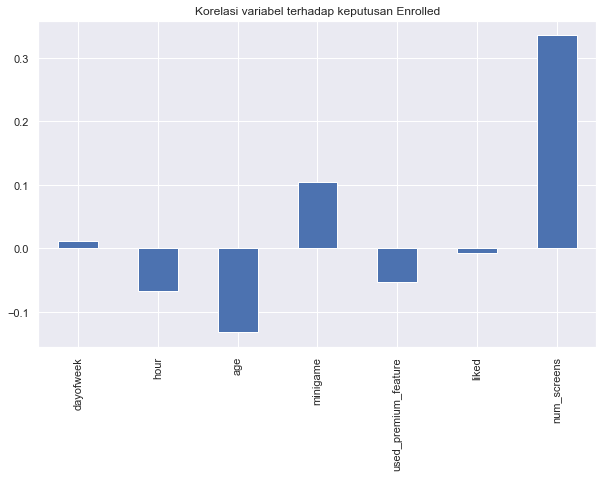

In [20]:
# Membuat correlation bar(mencari korelasi antara variable dependent dengan semua variable independent) plot dan correlation matrix(mencari korelasi antar variable independent)
fig,ax = plt.subplots(figsize=(10,6))
korelasi = df_numerik.drop(columns=['enrolled'], inplace=False).corrwith(df_numerik.enrolled)
korelasi.plot.bar(title='Korelasi variabel terhadap keputusan Enrolled')

**Insight** :
- 1. jumlah num_screens dan jumlah pelanggan yang memainkan minigame (independent) berkorelasi positif terhadap enrolled(dependent) tapi tidak terlalu besar yaitu 0.3/1.0 dan 0.1/1.0.     
- 2. semakin banyak fitur yang ada dan semakin banyak screen yang pelanggan explore terlepas dari fitur itu gratis atau premium maka akan semakin besar potensi pelanggan untuk enrolled/berlangganan.         
- 3. serta dapat terlihat bahwa pelanggan yang menggunakan fitur premium dan pelanggan yang semakin tua justru berkorelasi negatif/ tidak berlangganan, mungkin saja bisa dikatakan bahwa usia yang semakin tua akan lebih mencoba fitur premium saja dan tidak untuk berlangganan.
- 4. secara umum num_screen(independent) yang akan dijadikan prediktor utama dalam kasus ini.
 **Overall Analysis : dari sini kita tau bahwa pelanggan yang memutuskan berlangganan itu lebih sering explore pada aplikasi, maka ide nya adalah bisa saja pada bagian development aplikasi/websitenya harus bisa memberi performa yang optimal dan kesan semenarik mungkin, sehingga akan sangat berpotensi pada pelanggan untuk enrolled.**

<AxesSubplot:>

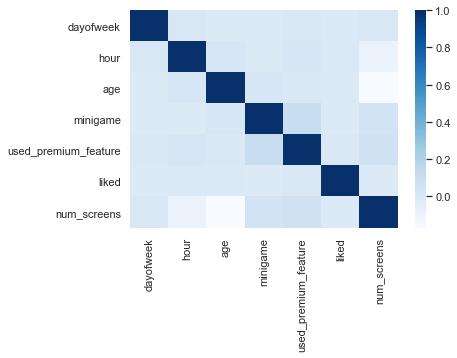

In [21]:
# cek korelasi antar variable independent
matriks_korelasi = df_numerik.drop(columns=['enrolled'], inplace=False).corr()
sns.heatmap(matriks_korelasi, cmap='Blues')

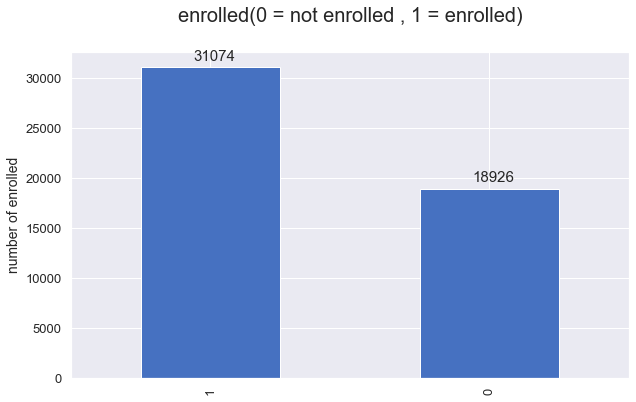

In [22]:
# enrolled distribution
ax = df['enrolled'].value_counts().plot(kind='bar', figsize=(10,6), fontsize =13, color='#4671C1')
ax.set_title('enrolled(0 = not enrolled , 1 = enrolled)', size=20, pad=30)
ax.set_ylabel('number of enrolled', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

Dari plot diatas kita dapat melihat proporsi dari orang yang berlangganan (1) lebih banyak dibandingkan yang tidak berlangganan, disini saya memutuskan untuk tidak melakukan teknik resampling untuk membuat balance pada data, dikarnakan proporsi datanya tida terlalu inbalance bahkan 1:2 pun tidak dan disini kita akan fokus ingin melihat objectivitas pada model machine learning yang akan dibuat.

## FEATURE ENGINEERING

In [23]:
# proses parsing
from dateutil import parser
df.first_open = [parser.parse(i) for i in df.first_open]
df.enrolled_date = [parser.parse(i) if isinstance(i, str) else i for i in df.enrolled_date]
df['selisih'] = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

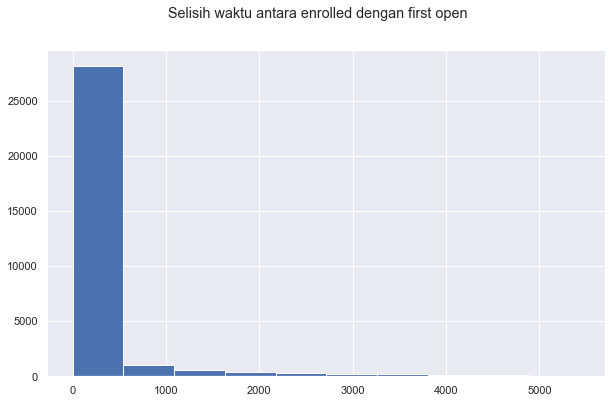

In [24]:
# Membuat plot histogram dataku.selisih
fig,ax = plt.subplots(figsize=(10,6))
plt.hist(df.selisih.dropna())
plt.suptitle('Selisih waktu antara enrolled dengan first open')
plt.show()

dari plot diatas terlihat bahwa keputusan customer untuk enrolled atau tidak ada di range sekitar 500jam pertama, namun ini semua akan menjadi subjecktive jika tidak dilihat lebih dekat lagi, maka dari itu kita persempit range waktunya nya menjadi di 200jam pertama saja.

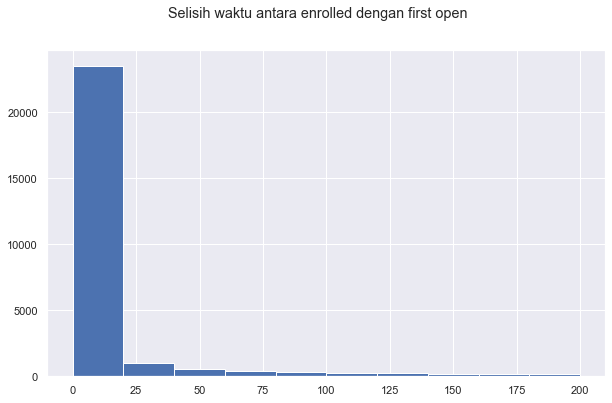

In [25]:
# Membuat plot histogram dataku.selisih
fig,ax = plt.subplots(figsize=(10,6))
plt.hist(df.selisih.dropna(), range=[0,200])
plt.suptitle('Selisih waktu antara enrolled dengan first open')
plt.show()

oke sekarang kita bisa simpulkan bahwa kebanyakan orang memutuskan untuk enrolled atau tidak di 24 jam pertama, maka dari itu kita akan lebih fokus untuk mengambil selisih waktu di 48jam pertama saja, untuk analisah lebih lanjut.

In [26]:
# Memfilter nilai selisih > 48 jam
df.loc[df.selisih>48, 'enrolled'] = 0

In [27]:
# Mengimpor data top_screens 
top_screens = pd.read_csv('data_input/top_screens.csv')
# Data top_screens merupakan data hasil pemecahan string (explode) dari screen_list lalu dilihat frekuensi tertingginya

In [28]:
top_screens = np.array(top_screens.loc[:,'top_screens'])

In [29]:
# Membuat data cadangan 
df2 = df.copy()

### One Hot encode using looping

In [30]:
# Membuat kolom baru yang berisikan dummy variable untuk setiap value top_screens dari screen_list. 
for screen in top_screens:
    df2[screen] = df2.screen_list.str.contains(screen).astype(int)
# Menghapus semua value pada screen_list berdasarkan value dari top_screens.
    df2['screen_list'] = df2.screen_list.str.replace(screen+',', '')

In [31]:
# Menjumlahkan banyaknya value non top_screens pada screen list
df2['number_non_top_screen'] = df2.screen_list.str.count(',')
df2

,user,first_open,dayofweek,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,number_non_top_screen
0,235136,2012-12-27 02:14:51.273,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",0,0,0,NaT,...,1,0,0,0,0,0,0,0,0,7
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaT,...,0,0,0,0,0,0,0,0,0,5
2,254414,2013-03-19 19:19:09.157,1,19,23,,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,ReferralCon...",0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,0,6
4,51549,2013-02-26 18:50:48.661,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Home,ScanPreview,VerifySSN,product_review,prod...",0,0,1,2013-05-09 13:47:52.875,...,0,0,1,0,0,0,0,0,0,6
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Home,",0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaT,...,0,0,0,0,0,0,0,0,0,6
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Home,product_review,product_review,product_rev...",0,0,1,2013-04-28 12:35:38.709,...,0,0,0,0,0,0,0,0,0,13


### Feature Grouping

In [32]:
# identify 
top_screens.sort()
top_screens

array(['AccountView', 'Alerts', 'BankVerification', 'CC1', 'CC1Category',
       'CC3', 'Credit1', 'Credit2', 'Credit3', 'Credit3Container',
       'Credit3Dashboard', 'Cycle', 'EditProfile', 'Finances',
       'Institutions', 'Leaderboard', 'ListPicker', 'Loan', 'Loan2',
       'Loan3', 'Loan4', 'Login', 'NetworkFailure', 'ProfileChildren ',
       'ProfileEducation', 'ProfileEducationMajor',
       'ProfileEmploymentLength', 'ProfileJobTitle',
       'ProfileMaritalStatus', 'ProfilePage', 'ResendToken',
       'RewardDetail', 'Rewards', 'RewardsContainer', 'Saving1',
       'Saving10', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5',
       'Saving6', 'Saving7', 'Saving8', 'Saving9', 'SecurityModal',
       'Splash', 'TransactionList', 'VerifyAnnualIncome', 'VerifyCountry',
       'VerifyDateOfBirth', 'VerifyHousing', 'VerifyHousingAmount',
       'VerifyIncomeType', 'VerifyMobile', 'VerifyPhone', 'WebView',
       'idscreen', 'location'], dtype=object)

Terdapat banyak feature atau kolom yang sejenis, disini saya akan melakukan funneling yang tujuannya untuk meringkas agar tidak banyak kolom dan mempercepat komputasi.

In [33]:
# Proses penggabungan beberapa screen yang sama (Funneling)
screen_loan = ['Loan',
              'Loan2',
              'Loan3',
              'Loan4']
df2['jumlah_loan'] = df2[screen_loan].sum(axis=1) # axis=1 artinya menghitung jumlah item per baris
df2.drop(columns=screen_loan, inplace=True) # menghilangkan semua kolom yg menjadi list savings_screen

In [34]:
screen_cc = ['CC1',
            'CC1Category',
            'CC3']
df2['jumlah_cc'] = df2[screen_cc].sum(axis=1)
df2.drop(columns=screen_cc, inplace=True)

In [35]:
screen_saving = ['Saving1',
                'Saving2',
                'Saving2Amount',
                'Saving4',
                'Saving5',
                'Saving6',
                'Saving7',
                'Saving8',
                'Saving9',
                'Saving10']
df2['jumlah_saving'] = df2[screen_saving].sum(axis=1) 
df2.drop(columns=screen_saving, inplace=True) 


In [36]:
screen_credit = ['Credit1',
                'Credit2',
                'Credit3',
                'Credit3Container',
                'Credit3Dashboard']
df2["jumlah_kredit"] = df2[screen_credit].sum(axis=1)
df2.drop(columns=screen_credit, inplace=True)

# Modeling
- Logistic Regression
- SVM
- Decission Trees
- Random Forest

### Model Spliting

In [37]:
# Mendefinisikan var dependen
y = np.array(df2['enrolled'])
# Menghilangkan beberapa kolom yang redundan
df2.drop(columns = ['first_open', 'screen_list','enrolled',
                        'enrolled_date', 'selisih'], inplace=True)

In [38]:
# For Logistic Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2,y, test_size = 0.2, random_state = 42 , stratify=y)

In [39]:
# Menyimpan user ID untuk training dan test set
train_id = np.array(X_train['user'])
test_id = np.array(X_test['user'])

In [40]:
# Menghilangkan kolom user di X_train dan X_test
X_train.drop(columns=['user'], inplace=True)
X_test.drop(columns=['user'], inplace=True)

C:\Users\ASUS\anaconda3\envs\projectx\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
# Merubah X_train dan X_test menjadi numpy array (test set sudah berbentuk array ajdi tidak perlu)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [42]:
# Menghilangkan variabel kosong
X_train = np.delete(X_train, 27, 1)
X_test = np.delete(X_test, 27, 1)

## Create the model without RandomizeCV.

### Feature Scaling

In [43]:
# Preprocessing Standardization (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Train The model
model_lr = LogisticRegression(solver="liblinear", random_state = 42, penalty = 'l1')
%time model_lr.fit(X_train, y_train)
# Predict model DecissionTree and summary statistic
%time lr_test_predict = model_lr.predict(X_test)
cm = confusion_matrix(y_test, lr_test_predict)
print(classification_report(y_test, lr_test_predict))
print(cm)

Wall time: 5.47 s
Wall time: 1.76 ms
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5030
           1       0.77      0.77      0.77      4970

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

[[3861 1169]
 [1160 3810]]


#### SVM

In [45]:
from sklearn.svm import SVC
# Train The model
model_svc = SVC(kernel="poly", random_state = 42, C=0.1, probability=True)
%time model_svc.fit(X_train, y_train)
# Predict model SVC gaussian and summary statistic
%time svc_test_predict = model_svc.predict(X_test)
cm = confusion_matrix(y_test, svc_test_predict)
print(classification_report(y_test, svc_test_predict))
print(cm)

Wall time: 10min 25s
Wall time: 10.5 s
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5030
           1       0.76      0.76      0.76      4970

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

[[3859 1171]
 [1169 3801]]


#### Decission Trees

In [46]:
from sklearn.tree import DecisionTreeClassifier
# Train The model
model_dt = DecisionTreeClassifier(criterion ="gini", max_depth = 10, random_state = 42)
%time model_dt.fit(X_train, y_train)
# Predict model DecissionTree and summary statistic
%time dt_test_predict = model_dt.predict(X_test)
cm = confusion_matrix(y_test, dt_test_predict)
print(classification_report(y_test, dt_test_predict))
print(cm)

Wall time: 177 ms
Wall time: 2.99 ms
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      5030
           1       0.80      0.73      0.76      4970

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

[[4094  936]
 [1326 3644]]


#### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
# Train The model
model_rf = RandomForestClassifier(criterion ="gini", max_depth = 10, n_estimators = 101, random_state = 42)
%time model_rf.fit(X_train, y_train)
# Predict model RandomForest and summary statistic
%time rf_test_predict = model_rf.predict(X_test)
cm = confusion_matrix(y_test, rf_test_predict)
print(classification_report(y_test, rf_test_predict))
print(cm)

Wall time: 1.92 s
Wall time: 112 ms
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      5030
           1       0.79      0.76      0.77      4970

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

[[3760 1210]
 [ 987 4043]]


Terlihat dari ke-empat model diatas, SVC memiliki rentan waktu yang cukup signifikan dibandingkan ke-tiga model lainnya dari segi training datanya namun unggul dalam kecepatan memprediksi dan yang unggul dari segi kecepatan dari ketiga model berdasarkan training dan predict nya adalah DecissionTrees, namun apakah DecissionTrees memiliki ketepatan dalam hal memprediksi?, disini dapat terlihat bahwa DecissionTrees memiliki hasil recall precission, f1score dan akurasi dari kedua kelasnya tidak begitu seimbang dibandingkan model logistic yang sangat fit di 77 dari summary statisticnya, namun loguistic memiliki ConfusionMatrix(hasil tebakan) yang tidak cukup baik, jika dilihat lagi dari ke empat model, disini saya menentukan bahwa RandomForestlah yang lumayan optimal dari segi summary statistic dan confusionmatrixnya mampu menebak True Positif dan True Negatif Classnya secara lebih banyak, dalam artian model ini sudah cukup baik dalam hal memprediksi, namun disini saya belum cukup puas jika melihat dari summary statistic nya saja, maka pada langkah selanjutnya saya akan membuat kurva ROC, lalu melihat perbandingan dari ke-empat modelnya sehingga bisa ditentukan model mana yang nantinya akan dipilih dan dilakukan hyperparameter tuning untuk lebih mengoptimalkan si model tsb.

### ROC Curve

In [48]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)

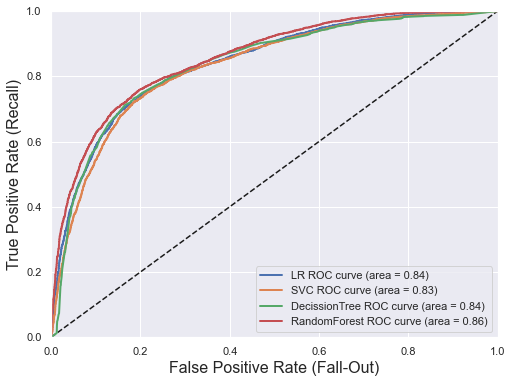

In [49]:
from sklearn.metrics import roc_curve,auc
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                   
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                           
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=["LR",'SVC','DecissionTree', 'RandomForest']
for idx,model in enumerate([model_lr,model_svc,model_dt,model_rf]):
    y_scores=model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

Disini sudah jelas bahwa model RandomForest lebih unggul, karna nilai TPR nya mendekati angka 1 yang dimana model cukup baik dalam hal memprediksi, tapi apakah model RandomForest ini akan lebih baik jika dilakukan HyperParameter Tuning?, pada langkah selanjutnya saya akan melakukan nya menggunakan RandomizeCV dimana model akan dilakukan pengujian secara berkala, menggunakan kombinasi dari parameternya secara acak.

## Create the model with RandomizeCV.

In [50]:
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

#### Random Forest based on RandomizedSearchCV

In [51]:
# Pipeline RandomizeCV model
from sklearn.pipeline import make_pipeline
# standard syntax
pipe = make_pipeline(StandardScaler(),RandomForestClassifier())

In [52]:
# RandomizeCV model
n_estimators = [int(x) for x in np.linspace(start=1, stop=150, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 100, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features':max_features,
               'randomforestclassifier__max_depth':max_depth,
               'randomforestclassifier__min_samples_split':min_samples_split,
               'randomforestclassifier__min_samples_leaf':min_samples_leaf,
               'randomforestclassifier__criterion':['gini','entropy']}

In [53]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(pipe, param_distributions=random_grid,
                                 cv=skf, random_state=42, n_jobs=-1)
rf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': [5,
                                                                              15,
                                                                              26,
                                                                              36,
                                                                              47,
                        

In [54]:
rf_randomcv.best_params_

{'randomforestclassifier__n_estimators': 83,
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__max_depth': 57,
 'randomforestclassifier__criterion': 'entropy'}

In [61]:
from sklearn.metrics import accuracy_score
rf_best_random = rf_randomcv.best_estimator_
y_pred_rf = rf_best_random.predict(X_test)
cm = confusion_matrix(y_pred_rf,y_test)
print(classification_report(y_pred_rf,y_test))
print(cm)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      5253
           1       0.76      0.80      0.78      4747

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

[[3786  961]
 [1184 4069]]


<AxesSubplot:xlabel='Prediksi', ylabel='Aktual'>

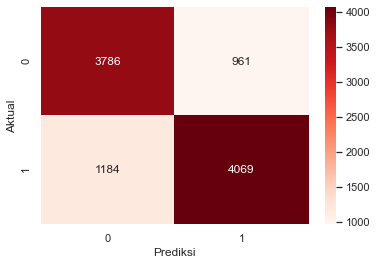

In [62]:
# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns = np.unique(y_test),
                        index = np.unique(y_test))

cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g')

Dari hasil pengujian secara acak menggunakan RandomizeCV, didapatkan score yang cukup indah dilihat, dimana didapatkan racikan parameter yang sesuai yaitu :

- 'n_estimators': 83,
- 'min_samples_split': 10,
- 'min_samples_leaf': 2,
- 'max_features': 'log2',
- 'max_depth': 57,
- 'criterion': 'entropy'

dengan parameter tersebut maka precission, recall, f1-score dan akurasinya naik, sehingga ketepatan dalam memprediksinyapun juga akan naik, kita dapat melihat juga bahwa FALSE POSITIVEnya berhasil berkurang, yang mana bisa diartikan bahwa orang yang tidak akan enrolled tetapi terprediksi enrolled itu berkurang sebanyak 249, hal ini akan menjadi masalah bagi team marketing jika model yang sebelumnya atau yang belum tuning digunakan dalam model inference, masalahnya adalah team marketing kesulitan melakukan approach yang cocok untuk orang" yang benar" ingin enrolled, tapi hasil prediksi mengatakan sebaliknya, dan fokus kita selanjutnya ada pada matrix TRUE NEGATIVE nya dimana team marketing dapat dengan mudah melakukan pendekatan terhadap orang yang terprediksi tidak enroled dan dia memang tidak akan enroled, sebab team marketing tidak akan menyia nyiakan waktu untuk approach terhadap customer tersebut.

# Model Inference

In [64]:
# Menggabungkan semuanya
y_pred_series = pd.Series(y_test).rename('actual', inplace=True)
hasil_akhir = pd.concat([y_pred_series, pd.DataFrame(test_id)], axis=1).dropna()
hasil_akhir['predict'] = y_pred_rf
hasil_akhir.rename(columns={0:'user'}, inplace = True)
hasil_akhir = hasil_akhir[['user','actual','predict']].reset_index(drop=True)

In [65]:
hasil_akhir

,user,actual,predict
0,75142,0,0
1,104426,0,1
2,365692,1,1
3,126533,0,0
4,192855,0,0
...,...,...,...
9995,139710,0,1
9996,352013,0,0
9997,334401,0,1
9998,89222,1,1
